In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd

import openpyxl

import nltk
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import word_tokenize

import plotly.express as px

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

In [ ]:
df = pd.read_csv('df_completo.csv')
df = df[(df['year']>=2020) & (df['year']<=2024)] #Segmentamos los datos del 2020 al 2024

In [ ]:

rnn_cols = df.drop(["fecha_hecho"], axis=1).columns #Separamos los datos en la variable dependiente y las independientes

X = df.drop(['fecha_hecho', 'tipo_delito', 'delito', 'categoria_delito', 'IDS_AdecEnergetica', 'IDS_SeguridadSocial',
             'IDS_BienesDurables', 'IDS_Telecomunicaciones', 'IDS_Salud', 'IDS_AdecSanitaria', 'Estado_IDS'], axis=1)
y = df['tipo_delito']

train_len = int(round(df.shape[0] * .8,0)) #Se escogen 80% de los datos de entrenamiento

time_steps = 12

X_train = X.iloc[:train_len]
y_train = y.iloc[:train_len]
X_test = X.iloc[train_len:]
y_test = y.iloc[train_len:]

print(f"Original length of training data: {len(X_train)}, {len(y_train)}")

Original length of training data: 157733, 157733


In [ ]:


def create_dataset(data, labels, time_steps):
    Xs = []
    ys = []

                                                      # Se crea un pad que agrega 0s para completar / acomodar los time_steps
    pad_width = time_steps - 1
    padded_data = np.pad(data, (pad_width, 0), mode='constant', constant_values=0)

    for i in range(len(data)):
        Xs += [padded_data[i:(i + time_steps)]]       # Agregamos los valores de la ventana de input a los valores del array de X
        ys += [labels[i]]                             # Agregamos las etiquetas (tipos de delitos) sin cambios
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(X_train.values, y_train.values, time_steps)

print(f"Final length of training data: {len(X_train)}, {len(y_train)}")
print(f"Original length of test data: {len(X_test)}, {len(y_test)}")
X_test, y_test = create_dataset(X_test.values, y_test.values, time_steps)
print(f"Final length of training data: {len(X_test)}, {len(y_test)}")
                                                      # Check for negative or unexpected values
print("Unique values in y_train:", np.unique(y_train))
                                                      # Check for negative or unexpected values
print("Unique values in y_test:", np.unique(y_test))
encoder = OneHotEncoder(sparse_output=False)          # Se ajusta a sparse=False para obtener un array denso
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))  # Reajuste si es que es 1D

print("Length of training data after encoding:", y_train_one_hot.shape)
print("Unique classes after encoding:", encoder.categories_)

Final length of training data: 157733, 157733
Original length of test data: 39433, 39433
Final length of training data: 39433, 39433
Unique values in y_train: [  1   2   3   4   5   6   8   9  10  12  15  16  17  19  20  21  22  23
  24  25  27  28  29  30  32  33  34  35  36  39  40  43  44  45  46  47
  48  49  50  51  52  54  57  59  61  63  64  65  66  67  68  70  71  72
  73  75  76  77  80  81  82  84  85  87  88  89  90  91  92  94  95  96
  97  98  99 101 102 103 105 106 107]
Unique values in y_test: [  2   3   4   5   6   8  10  12  15  19  20  21  22  23  24  27  28  29
  30  32  34  35  37  38  41  42  43  45  46  49  51  53  54  59  60  61
  63  64  65  66  69  71  72  73  75  76  79  80  82  84  87  88  89  90
  94  96  97  98  99 101 102 103 105 106 107]
Length of training data after encoding: (157733, 81)
Unique classes after encoding: [array([  1,   2,   3,   4,   5,   6,   8,   9,  10,  12,  15,  16,  17,
        19,  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,  3

Random Forest (Entrenamiento):

Accuracy           : 0.6349
Precision          : 0.6318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall             : 0.6349
F1-score           : 0.5984


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.82      0.30      0.44        46
           2       0.59      0.27      0.37      3819
           3       0.70      0.31      0.43      1989
           4       0.66      0.24      0.35       839
           5       0.69      0.30      0.42       767
           6       0.63      0.41      0.50     14294
           8       0.48      0.21      0.29       273
           9       1.00      0.14      0.25         7
          10       0.75      0.50      0.60         6
          12       0.56      0.34      0.43        29
          15       0.77      0.26      0.39       176
          16       0.63      0.21      0.31       242
          17       0.00      0.00      0.00         2
          19       0.65      0.38      0.48        39
          20       0.46      0.18      0.25       625
          21       0.80      0.36      0.50        11
          22       0.67      0.38      0.48      8791
          23       0.64    

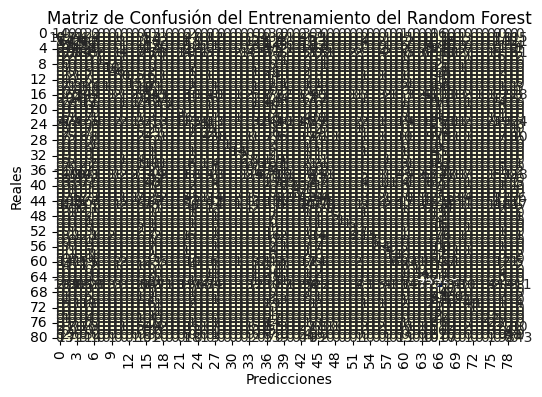

,hora_hecho,colonia_hecho,alcaldia_hecho,es_fin_de_semana,es_cercano_a_quincena
760000,1.0,692,6,0,1
760001,0.0,378,5,0,1
760003,1.0,1305,8,0,1
760005,1.0,691,8,0,1
760007,1.0,403,1,0,1
...,...,...,...,...,...
1041430,18.0,1366,12,0,0
1041431,14.0,550,14,1,0
1041432,21.0,577,14,0,0
1041433,19.0,1260,8,1,0


In [ ]:
# Implementación de Random Forest
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

X_train

rf_model = RandomForestClassifier()

X_train_RF = X.iloc[:train_len][['hora_hecho', 'colonia_hecho', 'alcaldia_hecho', 'es_fin_de_semana', 'es_cercano_a_quincena']]

                                                    #Se entrena el modelo
rf_model.fit(X_train_RF, y_train)

                                                    #Se hacen predicciones
rf_pred_train = rf_model.predict(X_train_RF)

print("Random Forest (Entrenamiento):\n")           #Se calculan métricas
print(f"Accuracy           : {accuracy_score(y_train, rf_pred_train):.4f}")
print(f"Precision          : {precision_score(y_train, rf_pred_train, average='weighted'):.4f}")
print(f"Recall             : {recall_score(y_train, rf_pred_train, average='weighted'):.4f}")
print(f"F1-score           : {f1_score(y_train, rf_pred_train, average='weighted'):.4f}")
print(classification_report(y_train, rf_pred_train), '\n')

conf_matrix = confusion_matrix(y_train, rf_pred_train)                   # Hacemos la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión del Entrenamiento del Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()
X.iloc[:train_len][['hora_hecho', 'colonia_hecho', 'alcaldia_hecho', 'es_fin_de_semana', 'es_cercano_a_quincena']]
